In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\spandana.s\OneDrive\Desktop\student_kmeans_dataset.csv")
print("Dataset Preview:\n", df.head())
df

Dataset Preview:
    Student_ID  Study_Hours  Exam_Score
0           1            2          20
1           2            3          25
2           3            4          28
3           4            6          45
4           5            7          50


,Student_ID,Study_Hours,Exam_Score
0,1,2,20
1,2,3,25
2,3,4,28
3,4,6,45
4,5,7,50
5,6,8,48
6,7,10,70
7,8,11,68
8,9,12,72
9,10,14,85


In [3]:
print("\nGoal: Group students into clusters based on study hours and exam scores to identify learning patterns.")


Goal: Group students into clusters based on study hours and exam scores to identify learning patterns.


In [4]:
X = df[["Study_Hours", "Exam_Score"]]

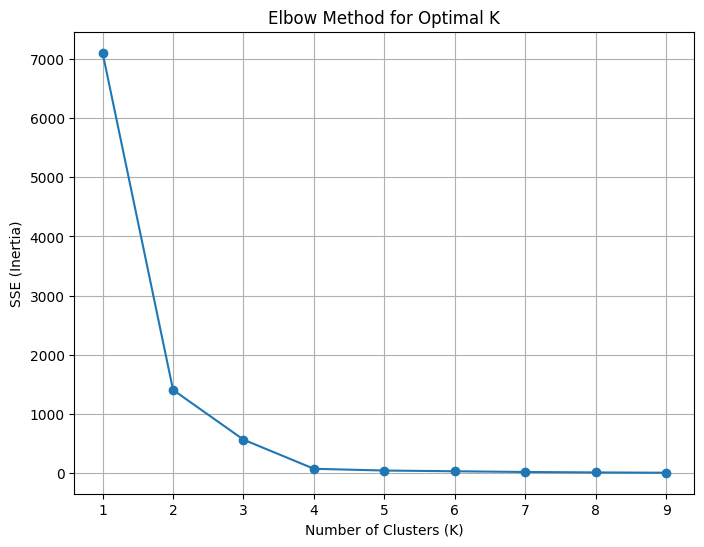


By inspecting the elbow curve, K=3 looks appropriate (clear bend).


In [5]:
sse = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K_range, sse, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

print("\nBy inspecting the elbow curve, K=3 looks appropriate (clear bend).")

In [6]:
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=10)

In [7]:
df["Cluster_K3"] = kmeans3.fit_predict(X)

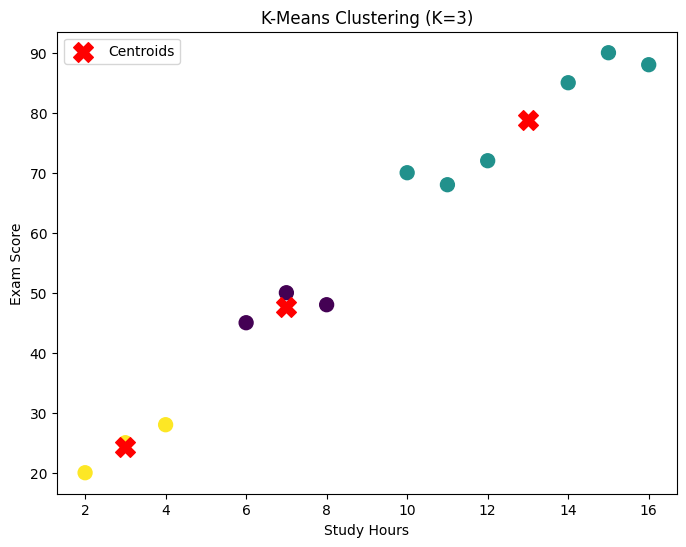

    Student_ID  Study_Hours  Exam_Score  Cluster_K3
0            1            2          20           2
1            2            3          25           2
2            3            4          28           2
3            4            6          45           0
4            5            7          50           0
5            6            8          48           0
6            7           10          70           1
7            8           11          68           1
8            9           12          72           1
9           10           14          85           1
10          11           15          90           1
11          12           16          88           1


In [8]:
plt.figure(figsize=(8,6))
plt.scatter(df["Study_Hours"], df["Exam_Score"], c=df["Cluster_K3"], cmap="viridis", s=100)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], 
            c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("K-Means Clustering (K=3)")
plt.legend()
plt.show()

# Check results
print(df[["Student_ID", "Study_Hours", "Exam_Score", "Cluster_K3"]])

In [9]:
print("\nInterpretation of Clusters (K=3):")
print("Cluster 0 → High study hours, high exam scores (High achievers).")
print("Cluster 1 → Moderate study hours, moderate exam scores (Average performers).")
print("Cluster 2 → Low study hours, low exam scores (Struggling students).")


Interpretation of Clusters (K=3):
Cluster 0 → High study hours, high exam scores (High achievers).
Cluster 1 → Moderate study hours, moderate exam scores (Average performers).
Cluster 2 → Low study hours, low exam scores (Struggling students).


In [10]:
print("\nHow the university can use clusters:")
print("- Cluster 2 (Struggling): Provide remedial classes, extra mentoring.")
print("- Cluster 1 (Average): Encourage better study plans, time management.")
print("- Cluster 0 (High Achievers): Offer enrichment, advanced programs.")


How the university can use clusters:
- Cluster 2 (Struggling): Provide remedial classes, extra mentoring.
- Cluster 1 (Average): Encourage better study plans, time management.
- Cluster 0 (High Achievers): Offer enrichment, advanced programs.


In [11]:
print("\nChallenges & Limitations of K-Means:")
print("- Small dataset (only 12 students).")
print("- Sensitive to outliers.")
print("- Assumes clusters are spherical.")
print("- Choosing K is subjective.")


Challenges & Limitations of K-Means:
- Small dataset (only 12 students).
- Sensitive to outliers.
- Assumes clusters are spherical.
- Choosing K is subjective.


In [12]:
print("\nIf new students join: re-run K-Means with the updated dataset or use Mini-Batch K-Means for dynamic updates.")


If new students join: re-run K-Means with the updated dataset or use Mini-Batch K-Means for dynamic updates.


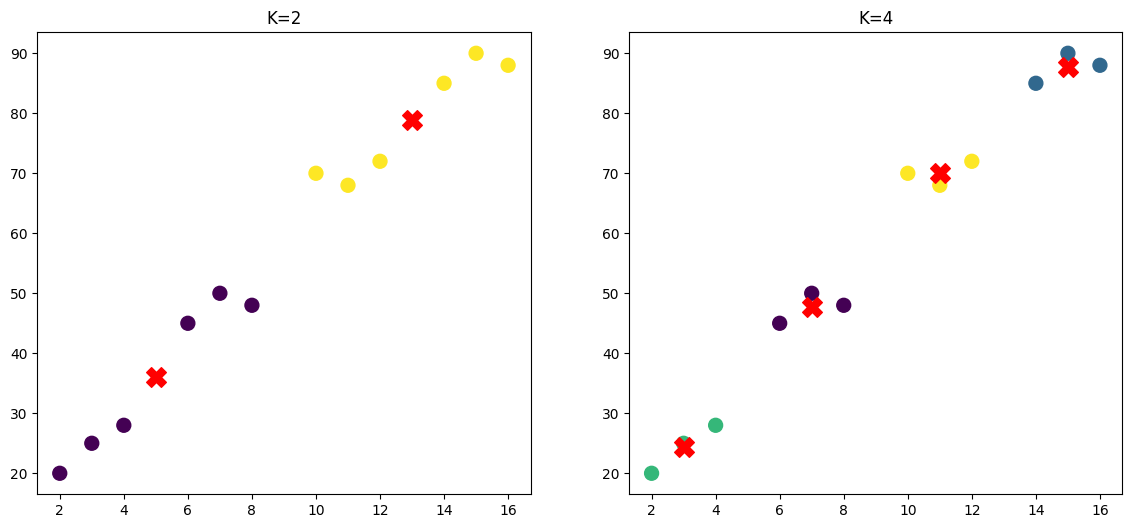

In [13]:
kmeans2 = KMeans(n_clusters=2, random_state=42, n_init=10)
df["Cluster_K2"] = kmeans2.fit_predict(X)

kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster_K4"] = kmeans4.fit_predict(X)

# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# K=2
axes[0].scatter(df["Study_Hours"], df["Exam_Score"], c=df["Cluster_K2"], cmap="viridis", s=100)
axes[0].scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c="red", marker="X", s=200)
axes[0].set_title("K=2")

# K=4
axes[1].scatter(df["Study_Hours"], df["Exam_Score"], c=df["Cluster_K4"], cmap="viridis", s=100)
axes[1].scatter(kmeans4.cluster_centers_[:,0], kmeans4.cluster_centers_[:,1], c="red", marker="X", s=200)
axes[1].set_title("K=4")

plt.show()

In [14]:
print("\nComparison:")
print("- K=2 → Separates weak/average vs strong, but too broad.")
print("- K=4 → Splits high achievers into 'good' and 'top scorers', may be over-detailed for small data.")
print("- K=3 → Balanced and meaningful.")


Comparison:
- K=2 → Separates weak/average vs strong, but too broad.
- K=4 → Splits high achievers into 'good' and 'top scorers', may be over-detailed for small data.
- K=3 → Balanced and meaningful.


In [15]:
print("\nAlternative / Improvement:")
print("- Hierarchical Clustering (good for small datasets).")
print("- Gaussian Mixture Models (GMM) → allows soft clustering.")
print("- DBSCAN → handles outliers and irregular cluster shapes.")


Alternative / Improvement:
- Hierarchical Clustering (good for small datasets).
- Gaussian Mixture Models (GMM) → allows soft clustering.
- DBSCAN → handles outliers and irregular cluster shapes.
